In [1]:
# from marketsim.simulator.sampled_arrival_simulator import SimulatorSampledArrival
from marketsim.simulator.shock_simulator import ShockSimulator
from marketsim.fourheap.constants import BUY, SELL
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

Figure 6.1.a - Pg 62 top left

Notes: 
- Shade and eta are undefined
- using Shade = [500, 1000] and eta = 0.8, common paramters in later settings
- Shock Volume is undefined, using 500
- Reference uses Sell side shock only, I am including both Sell and Buy side shocks
- A lam value of 2e-4 produces results that better match the graphs. It doesn't technically specify what the lam value from the graph is, but the general default is 2e-3
- These results are generated with lam = 2e-3

Sell Side Shocks: 

AVG No shock surplus: 59.05010986328125
No shock surplusses:[tensor(59.0501)]
AVG Shock surplus: 1726.491943359375
Shock surplusses:[tensor(1726.4919)]
AVG No shock surplus: 126.87596130371094
No shock surplusses:[tensor(126.8760)]
AVG Shock surplus: -77.71762084960938
Shock surplusses:[tensor(-77.7176)]
AVG No shock surplus: 54.38840866088867
No shock surplusses:[tensor(54.3884)]
AVG Shock surplus: 1158.55859375
Shock surplusses:[tensor(1158.5586)]
AVG No shock surplus: 85.11605072021484
No shock surplusses:[tensor(85.1161)]
AVG Shock surplus: 234.70257568359375
Shock surplusses:[tensor(234.7026)]
AVG No shock surplus: 48.66865921020508
No shock surplusses:[tensor(48.6687)]
AVG Shock surplus: 2852.273193359375
Shock surplusses:[tensor(2852.2732)]
AVG No shock surplus: 133.23484802246094
No shock surplusses:[tensor(133.2348)]
AVG Shock surplus: 1272.76904296875
Shock surplusses:[tensor(1272.7690)]
AVG No shock surplus: 12.247142791748047
No shock surplusses:[tensor(12.2471)]
AVG Shock 

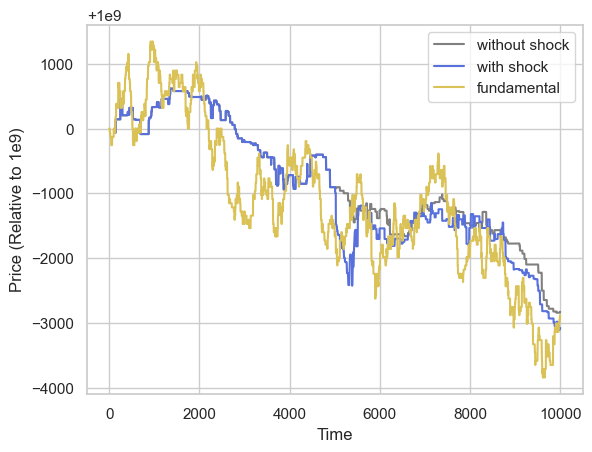

In [2]:
%%time

for seed in range(1, 10):

    surpluses_ns = []

    sim_ns = ShockSimulator(
                num_background_agents=66,
                num_trend_agents=0,
                sim_time=10000,
                num_assets = 1,
                lam = 2e-3,  
                lam_trend = 5e-3,
                mean = 1e9,
                r = 0,
                shock_var = 1e3,
                q_max = 10,
                pv_var = 1e6,
                shade=[500, 1000],
                obs_var = 1e6,
                eta = 0.8,
                observe_transactions = False,
                strategic_variance = 1e6,
                shock_entry_time = 5000,
                shock_interval = 500,
                shock_volume = 0,
                shock_side = SELL,
                L = 5,
                PI = 100.0,
                texp = 50,
                random_seed = seed,
                )


    data_ns = sim_ns.run()
    fundamental_val_ns = sim_ns.markets[0].get_final_fundamental()
    values_ns = []

    for agent_id in sim_ns.agents:
        agent = sim_ns.agents[agent_id]
        value = agent.get_pos_value() + agent.position * fundamental_val_ns + agent.cash
        # print(agent.cash, agent.position, agent.get_pos_value(), value)
        values_ns.append(value)
    surpluses_ns.append(sum(values_ns)/len(values_ns))

    print(f"AVG No shock surplus: {sum(surpluses_ns)/len(surpluses_ns)}")
    print(f"No shock surplusses:{surpluses_ns}")


    surpluses_s = []

    sim_s = ShockSimulator(
                num_background_agents=66,
                num_trend_agents=0,
                sim_time=10000,
                num_assets = 1,
                lam = 2e-3,  
                lam_trend = 5e-3,
                mean = 1e9,
                r = 0,
                shock_var = 1e3,
                q_max = 10,
                pv_var = 1e6,
                shade=[500, 1000],
                obs_var = 1e6,
                eta = 0.8,
                observe_transactions = False,
                strategic_variance = 1e6,
                shock_entry_time = 5000,
                shock_interval = 500,
                shock_volume = 500,
                shock_side = SELL,
                L = 5,
                PI = 100.0,
                texp = 50,
                random_seed = seed,
                )


    data_s = sim_s.run()
    fundamental_val_s = sim_s.markets[0].get_final_fundamental()
    values_s = []
    for agent_id in sim_s.agents:
        agent = sim_s.agents[agent_id]
        value = agent.get_pos_value() + agent.position * fundamental_val_s + agent.cash
        # print(agent.cash, agent.position, agent.get_pos_value(), value)
        values_s.append(value)
    surpluses_s.append(sum(values_s)/len(values_s))

    print(f"AVG Shock surplus: {sum(surpluses_s)/len(surpluses_s)}")
    print(f"Shock surplusses:{surpluses_s}")


    Xns, Ybns, Yans, fns = data_ns
    Xs, Ybs, Yas, fs = data_s

    prices_ns = [(a + b) / 2 for a, b in zip(Ybns, Yans)]
    prices_s = [(a + b) / 2 for a, b in zip(Ybs, Yas)]

    plt.clf()

    # Plot using Seaborn and Matplotlib
    sns.set(style="whitegrid")
    palette = sns.color_palette("hls", 8)
    sns.lineplot(data=prices_ns, color='gray', label='without shock')
    sns.lineplot(data=prices_s, color=palette[5], label='with shock')
    sns.lineplot(data=fns, color=palette[1], label='fundamental')

    # Set plot labels and title
    plt.xlabel('Time')
    plt.ylabel('Price (Relative to 1e9)')
    plt.title('')

    # Display legend
    plt.legend()

    base = "/Users/rishithseelam/Code/SURE-SRG/market-sim-py/results/fig_6.1.a/"

    # Show plot
    plt.savefig(base + f"6.1.a_{seed}_SELL.png")


Buy Side Shocks: 

AVG No shock surplus: 59.05010986328125
No shock surplusses:[tensor(59.0501)]
AVG Shock surplus: -571.8727416992188
Shock surplusses:[tensor(-571.8727)]
AVG No shock surplus: 126.87596130371094
No shock surplusses:[tensor(126.8760)]
AVG Shock surplus: 1393.8641357421875
Shock surplusses:[tensor(1393.8641)]
AVG No shock surplus: 54.38840866088867
No shock surplusses:[tensor(54.3884)]
AVG Shock surplus: 251.72647094726562
Shock surplusses:[tensor(251.7265)]
AVG No shock surplus: 85.11605072021484
No shock surplusses:[tensor(85.1161)]
AVG Shock surplus: 1373.527587890625
Shock surplusses:[tensor(1373.5276)]
AVG No shock surplus: 48.66865921020508
No shock surplusses:[tensor(48.6687)]
AVG Shock surplus: -934.9671630859375
Shock surplusses:[tensor(-934.9672)]
AVG No shock surplus: 133.23484802246094
No shock surplusses:[tensor(133.2348)]
AVG Shock surplus: 540.8536376953125
Shock surplusses:[tensor(540.8536)]
AVG No shock surplus: 12.247142791748047
No shock surplusses:[tensor(12.2471)]
AVG

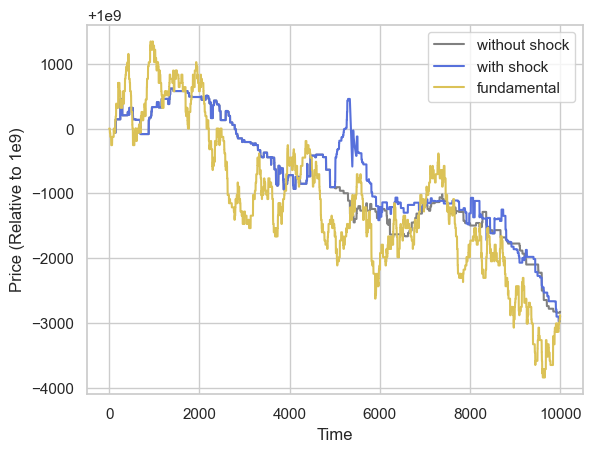

In [3]:
%%time

for seed in range(1, 10):

    surpluses_ns = []

    sim_ns = ShockSimulator(
                num_background_agents=66,
                num_trend_agents=0,
                sim_time=10000,
                num_assets = 1,
                lam = 2e-3,  
                lam_trend = 5e-3,
                mean = 1e9,
                r = 0,
                shock_var = 1e3,
                q_max = 10,
                pv_var = 1e6,
                shade=[500, 1000],
                obs_var = 1e6,
                eta = 0.8,
                observe_transactions = False,
                strategic_variance = 1e6,
                shock_entry_time = 5000,
                shock_interval = 500,
                shock_volume = 0,
                shock_side = BUY,
                L = 5,
                PI = 100.0,
                texp = 50,
                random_seed = seed,
                )


    data_ns = sim_ns.run()
    fundamental_val_ns = sim_ns.markets[0].get_final_fundamental()
    values_ns = []

    for agent_id in sim_ns.agents:
        agent = sim_ns.agents[agent_id]
        value = agent.get_pos_value() + agent.position * fundamental_val_ns + agent.cash
        # print(agent.cash, agent.position, agent.get_pos_value(), value)
        values_ns.append(value)
    surpluses_ns.append(sum(values_ns)/len(values_ns))

    print(f"AVG No shock surplus: {sum(surpluses_ns)/len(surpluses_ns)}")
    print(f"No shock surplusses:{surpluses_ns}")


    surpluses_s = []

    sim_s = ShockSimulator(
                num_background_agents=66,
                num_trend_agents=0,
                sim_time=10000,
                num_assets = 1,
                lam = 2e-3,  
                lam_trend = 5e-3,
                mean = 1e9,
                r = 0,
                shock_var = 1e3,
                q_max = 10,
                pv_var = 1e6,
                shade=[500, 1000],
                obs_var = 1e6,
                eta = 0.8,
                observe_transactions = False,
                strategic_variance = 1e6,
                shock_entry_time = 5000,
                shock_interval = 500,
                shock_volume = 500,
                shock_side = BUY,
                L = 5,
                PI = 100.0,
                texp = 50,
                random_seed = seed,
                )


    data_s = sim_s.run()
    fundamental_val_s = sim_s.markets[0].get_final_fundamental()
    values_s = []
    for agent_id in sim_s.agents:
        agent = sim_s.agents[agent_id]
        value = agent.get_pos_value() + agent.position * fundamental_val_s + agent.cash
        # print(agent.cash, agent.position, agent.get_pos_value(), value)
        values_s.append(value)
    surpluses_s.append(sum(values_s)/len(values_s))

    print(f"AVG Shock surplus: {sum(surpluses_s)/len(surpluses_s)}")
    print(f"Shock surplusses:{surpluses_s}")


    Xns, Ybns, Yans, fns = data_ns
    Xs, Ybs, Yas, fs = data_s

    prices_ns = [(a + b) / 2 for a, b in zip(Ybns, Yans)]
    prices_s = [(a + b) / 2 for a, b in zip(Ybs, Yas)]

    plt.clf()

    # Plot using Seaborn and Matplotlib
    sns.set(style="whitegrid")
    palette = sns.color_palette("hls", 8)
    sns.lineplot(data=prices_ns, color='gray', label='without shock')
    sns.lineplot(data=prices_s, color=palette[5], label='with shock')
    sns.lineplot(data=fns, color=palette[1], label='fundamental')

    # Set plot labels and title
    plt.xlabel('Time')
    plt.ylabel('Price (Relative to 1e9)')
    plt.title('')

    # Display legend
    plt.legend()

    base = "/Users/rishithseelam/Code/SURE-SRG/market-sim-py/results/fig_6.1.a/"

    # Show plot
    plt.savefig(base + f"6.1.a_{seed}_BUY.png")


Figure 6.1.b - Pg 62 top right

Notes: 
- same notes as for 6.1.a
- difference is that this graph enables ZI trader market observation 
- strategic_variance = 1e6, this is not explicitly defined in the thesis

Sell Side Shocks:

AVG No shock surplus: 156.7886505126953
No shock surplusses:[tensor(156.7887)]
AVG Shock surplus: 1870.7569580078125
Shock surplusses:[tensor(1870.7570)]
AVG No shock surplus: 190.74581909179688
No shock surplusses:[tensor(190.7458)]
AVG Shock surplus: 85.89608001708984
Shock surplusses:[tensor(85.8961)]
AVG No shock surplus: 183.31068420410156
No shock surplusses:[tensor(183.3107)]
AVG Shock surplus: 1290.4404296875
Shock surplusses:[tensor(1290.4404)]
AVG No shock surplus: 158.49270629882812
No shock surplusses:[tensor(158.4927)]
AVG Shock surplus: 648.81787109375
Shock surplusses:[tensor(648.8179)]
AVG No shock surplus: 161.84678649902344
No shock surplusses:[tensor(161.8468)]
AVG Shock surplus: 3442.54833984375
Shock surplusses:[tensor(3442.5483)]
AVG No shock surplus: 209.25387573242188
No shock surplusses:[tensor(209.2539)]
AVG Shock surplus: 1824.9078369140625
Shock surplusses:[tensor(1824.9078)]
AVG No shock surplus: 138.50436401367188
No shock surplusses:[tensor(138.5044)]
AVG

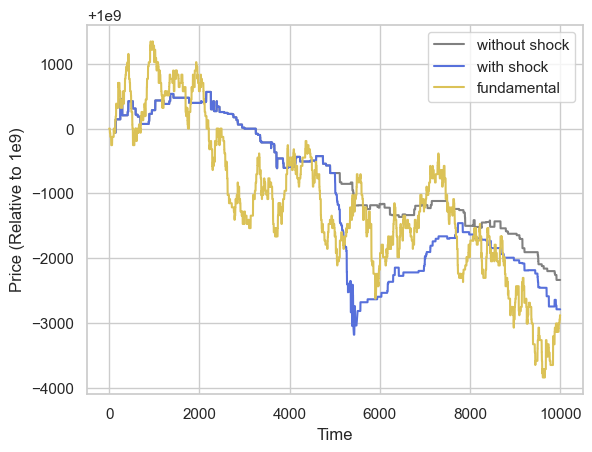

In [4]:
%%time

for seed in range(1, 10):

    surpluses_ns = []

    sim_ns = ShockSimulator(
                num_background_agents=66,
                num_trend_agents=0,
                sim_time=10000,
                num_assets = 1,
                lam = 2e-3,  
                lam_trend = 5e-3,
                mean = 1e9,
                r = 0,
                shock_var = 1e3,
                q_max = 10,
                pv_var = 1e6,
                shade=[500, 1000],
                obs_var = 1e6,
                eta = 0.8,
                observe_transactions = True,
                strategic_variance = 1e6,
                shock_entry_time = 5000,
                shock_interval = 500,
                shock_volume = 0,
                shock_side = SELL,
                L = 5,
                PI = 100.0,
                texp = 50,
                random_seed = seed,
                )


    data_ns = sim_ns.run()
    fundamental_val_ns = sim_ns.markets[0].get_final_fundamental()
    values_ns = []

    for agent_id in sim_ns.agents:
        agent = sim_ns.agents[agent_id]
        value = agent.get_pos_value() + agent.position * fundamental_val_ns + agent.cash
        # print(agent.cash, agent.position, agent.get_pos_value(), value)
        values_ns.append(value)
    surpluses_ns.append(sum(values_ns)/len(values_ns))

    print(f"AVG No shock surplus: {sum(surpluses_ns)/len(surpluses_ns)}")
    print(f"No shock surplusses:{surpluses_ns}")


    surpluses_s = []

    sim_s = ShockSimulator(
                num_background_agents=66,
                num_trend_agents=0,
                sim_time=10000,
                num_assets = 1,
                lam = 2e-3,  
                lam_trend = 5e-3,
                mean = 1e9,
                r = 0,
                shock_var = 1e3,
                q_max = 10,
                pv_var = 1e6,
                shade=[500, 1000],
                obs_var = 1e6,
                eta = 0.8,
                observe_transactions = True,
                strategic_variance = 1e6,
                shock_entry_time = 5000,
                shock_interval = 500,
                shock_volume = 500,
                shock_side = SELL,
                L = 5,
                PI = 100.0,
                texp = 50,
                random_seed = seed,
                )


    data_s = sim_s.run()
    fundamental_val_s = sim_s.markets[0].get_final_fundamental()
    values_s = []
    for agent_id in sim_s.agents:
        agent = sim_s.agents[agent_id]
        value = agent.get_pos_value() + agent.position * fundamental_val_s + agent.cash
        # print(agent.cash, agent.position, agent.get_pos_value(), value)
        values_s.append(value)
    surpluses_s.append(sum(values_s)/len(values_s))

    print(f"AVG Shock surplus: {sum(surpluses_s)/len(surpluses_s)}")
    print(f"Shock surplusses:{surpluses_s}")


    Xns, Ybns, Yans, fns = data_ns
    Xs, Ybs, Yas, fs = data_s

    prices_ns = [(a + b) / 2 for a, b in zip(Ybns, Yans)]
    prices_s = [(a + b) / 2 for a, b in zip(Ybs, Yas)]

    plt.clf()

    # Plot using Seaborn and Matplotlib
    sns.set(style="whitegrid")
    palette = sns.color_palette("hls", 8)
    sns.lineplot(data=prices_ns, color='gray', label='without shock')
    sns.lineplot(data=prices_s, color=palette[5], label='with shock')
    sns.lineplot(data=fns, color=palette[1], label='fundamental')

    # Set plot labels and title
    plt.xlabel('Time')
    plt.ylabel('Price (Relative to 1e9)')
    plt.title('')

    # Display legend
    plt.legend()

    base = "/Users/rishithseelam/Code/SURE-SRG/market-sim-py/results/fig_6.1.b/"

    # Show plot
    plt.savefig(base + f"6.1.b_{seed}_SELL.png")


Buy Side Shocks: 

AVG No shock surplus: 156.7886505126953
No shock surplusses:[tensor(156.7887)]
AVG Shock surplus: -90.88983917236328
Shock surplusses:[tensor(-90.8898)]
AVG No shock surplus: 190.74581909179688
No shock surplusses:[tensor(190.7458)]
AVG Shock surplus: 1798.31884765625
Shock surplusses:[tensor(1798.3188)]
AVG No shock surplus: 183.31068420410156
No shock surplusses:[tensor(183.3107)]
AVG Shock surplus: 561.0145874023438
Shock surplusses:[tensor(561.0146)]
AVG No shock surplus: 158.49270629882812
No shock surplusses:[tensor(158.4927)]
AVG Shock surplus: 1578.05615234375
Shock surplusses:[tensor(1578.0562)]
AVG No shock surplus: 161.84678649902344
No shock surplusses:[tensor(161.8468)]
AVG Shock surplus: -675.9966430664062
Shock surplusses:[tensor(-675.9966)]
AVG No shock surplus: 209.25387573242188
No shock surplusses:[tensor(209.2539)]
AVG Shock surplus: 952.2227172851562
Shock surplusses:[tensor(952.2227)]
AVG No shock surplus: 138.50436401367188
No shock surplusses:[tensor(138.5044)]


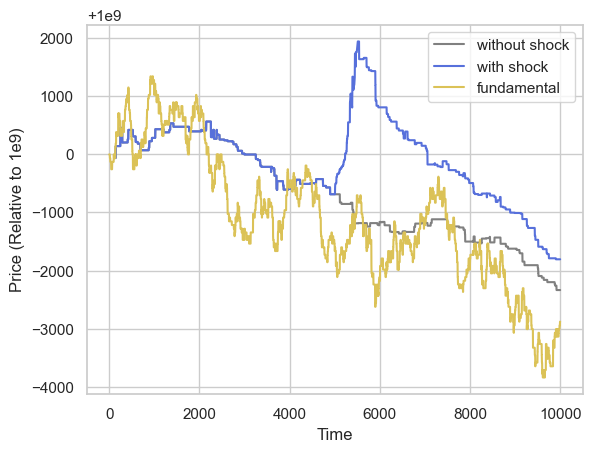

In [5]:
%%time

for seed in range(1, 10):

    surpluses_ns = []

    sim_ns = ShockSimulator(
                num_background_agents=66,
                num_trend_agents=0,
                sim_time=10000,
                num_assets = 1,
                lam = 2e-3,  
                lam_trend = 5e-3,
                mean = 1e9,
                r = 0,
                shock_var = 1e3,
                q_max = 10,
                pv_var = 1e6,
                shade=[500, 1000],
                obs_var = 1e6,
                eta = 0.8,
                observe_transactions = True,
                strategic_variance = 1e6,
                shock_entry_time = 5000,
                shock_interval = 500,
                shock_volume = 0,
                shock_side = BUY,
                L = 5,
                PI = 100.0,
                texp = 50,
                random_seed = seed,
                )


    data_ns = sim_ns.run()
    fundamental_val_ns = sim_ns.markets[0].get_final_fundamental()
    values_ns = []

    for agent_id in sim_ns.agents:
        agent = sim_ns.agents[agent_id]
        value = agent.get_pos_value() + agent.position * fundamental_val_ns + agent.cash
        # print(agent.cash, agent.position, agent.get_pos_value(), value)
        values_ns.append(value)
    surpluses_ns.append(sum(values_ns)/len(values_ns))

    print(f"AVG No shock surplus: {sum(surpluses_ns)/len(surpluses_ns)}")
    print(f"No shock surplusses:{surpluses_ns}")


    surpluses_s = []

    sim_s = ShockSimulator(
                num_background_agents=66,
                num_trend_agents=0,
                sim_time=10000,
                num_assets = 1,
                lam = 2e-3,  
                lam_trend = 5e-3,
                mean = 1e9,
                r = 0,
                shock_var = 1e3,
                q_max = 10,
                pv_var = 1e6,
                shade=[500, 1000],
                obs_var = 1e6,
                eta = 0.8,
                observe_transactions = True,
                strategic_variance = 1e6,
                shock_entry_time = 5000,
                shock_interval = 500,
                shock_volume = 500,
                shock_side = BUY,
                L = 5,
                PI = 100.0,
                texp = 50,
                random_seed = seed,
                )


    data_s = sim_s.run()
    fundamental_val_s = sim_s.markets[0].get_final_fundamental()
    values_s = []
    for agent_id in sim_s.agents:
        agent = sim_s.agents[agent_id]
        value = agent.get_pos_value() + agent.position * fundamental_val_s + agent.cash
        # print(agent.cash, agent.position, agent.get_pos_value(), value)
        values_s.append(value)
    surpluses_s.append(sum(values_s)/len(values_s))

    print(f"AVG Shock surplus: {sum(surpluses_s)/len(surpluses_s)}")
    print(f"Shock surplusses:{surpluses_s}")


    Xns, Ybns, Yans, fns = data_ns
    Xs, Ybs, Yas, fs = data_s

    prices_ns = [(a + b) / 2 for a, b in zip(Ybns, Yans)]
    prices_s = [(a + b) / 2 for a, b in zip(Ybs, Yas)]

    plt.clf()

    # Plot using Seaborn and Matplotlib
    sns.set(style="whitegrid")
    palette = sns.color_palette("hls", 8)
    sns.lineplot(data=prices_ns, color='gray', label='without shock')
    sns.lineplot(data=prices_s, color=palette[5], label='with shock')
    sns.lineplot(data=fns, color=palette[1], label='fundamental')

    # Set plot labels and title
    plt.xlabel('Time')
    plt.ylabel('Price (Relative to 1e9)')
    plt.title('')

    # Display legend
    plt.legend()

    base = "/Users/rishithseelam/Code/SURE-SRG/market-sim-py/results/fig_6.1.b/"

    # Show plot
    plt.savefig(base + f"6.1.b_{seed}_BUY.png")


Figure 6.2 - page 63

Notes: 
- Didnt specify the trend paramters
- using PI = 
- Questions about my interpretation of this plot: 
- Why would Trend Length affect the fundamental difference in cases Without Trend Followers?
- Why is there a positive bias? random chance?


AVG No shock surplus: 59.05010986328125
No shock surplusses:[tensor(59.0501)]
AVG Shock surplus: -90.88983917236328
Shock surplusses:[tensor(-90.8898)]
AVG No shock surplus: 126.87596130371094
No shock surplusses:[tensor(126.8760)]
AVG Shock surplus: 1798.31884765625
Shock surplusses:[tensor(1798.3188)]
AVG No shock surplus: 54.38840866088867
No shock surplusses:[tensor(54.3884)]
AVG Shock surplus: 561.0145874023438
Shock surplusses:[tensor(561.0146)]
AVG No shock surplus: 85.11605072021484
No shock surplusses:[tensor(85.1161)]
AVG Shock surplus: 1578.05615234375
Shock surplusses:[tensor(1578.0562)]
AVG No shock surplus: 48.66865921020508
No shock surplusses:[tensor(48.6687)]
AVG Shock surplus: -675.9966430664062
Shock surplusses:[tensor(-675.9966)]
AVG No shock surplus: 133.23484802246094
No shock surplusses:[tensor(133.2348)]
AVG Shock surplus: 952.2227172851562
Shock surplusses:[tensor(952.2227)]
AVG No shock surplus: 12.247142791748047
No shock surplusses:[tensor(12.2471)]
AVG Shoc

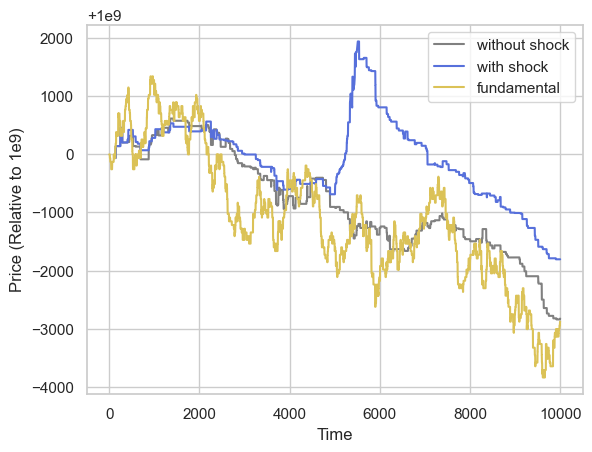

In [6]:
%%time

for seed in range(1, 10):

    surpluses_ns = []

    sim_ns = ShockSimulator(
                num_background_agents=66,
                num_trend_agents=0,
                sim_time=10000,
                num_assets = 1,
                lam = 2e-3,  
                lam_trend = 5e-3,
                mean = 1e9,
                r = 0,
                shock_var = 1e3,
                q_max = 10,
                pv_var = 1e6,
                shade=[500, 1000],
                obs_var = 1e6,
                eta = 0.8,
                observe_transactions = False,
                strategic_variance = 1e6,
                shock_entry_time = 5000,
                shock_interval = 500,
                shock_volume = 0,
                shock_side = BUY,
                L = 5,
                PI = 100.0,
                texp = 50,
                random_seed = seed,
                )


    data_ns = sim_ns.run()
    fundamental_val_ns = sim_ns.markets[0].get_final_fundamental()
    values_ns = []

    for agent_id in sim_ns.agents:
        agent = sim_ns.agents[agent_id]
        value = agent.get_pos_value() + agent.position * fundamental_val_ns + agent.cash
        # print(agent.cash, agent.position, agent.get_pos_value(), value)
        values_ns.append(value)
    surpluses_ns.append(sum(values_ns)/len(values_ns))

    print(f"AVG No shock surplus: {sum(surpluses_ns)/len(surpluses_ns)}")
    print(f"No shock surplusses:{surpluses_ns}")


    surpluses_s = []

    sim_s = ShockSimulator(
                num_background_agents=66,
                num_trend_agents=0,
                sim_time=10000,
                num_assets = 1,
                lam = 2e-3,  
                lam_trend = 5e-3,
                mean = 1e9,
                r = 0,
                shock_var = 1e3,
                q_max = 10,
                pv_var = 1e6,
                shade=[500, 1000],
                obs_var = 1e6,
                eta = 0.8,
                observe_transactions = True,
                strategic_variance = 1e6,
                shock_entry_time = 5000,
                shock_interval = 500,
                shock_volume = 500,
                shock_side = BUY,
                L = 5,
                PI = 100.0,
                texp = 50,
                random_seed = seed,
                )


    data_s = sim_s.run()
    fundamental_val_s = sim_s.markets[0].get_final_fundamental()
    values_s = []
    for agent_id in sim_s.agents:
        agent = sim_s.agents[agent_id]
        value = agent.get_pos_value() + agent.position * fundamental_val_s + agent.cash
        # print(agent.cash, agent.position, agent.get_pos_value(), value)
        values_s.append(value)
    surpluses_s.append(sum(values_s)/len(values_s))

    print(f"AVG Shock surplus: {sum(surpluses_s)/len(surpluses_s)}")
    print(f"Shock surplusses:{surpluses_s}")


    Xns, Ybns, Yans, fns = data_ns
    Xs, Ybs, Yas, fs = data_s

    prices_ns = [(a + b) / 2 for a, b in zip(Ybns, Yans)]
    prices_s = [(a + b) / 2 for a, b in zip(Ybs, Yas)]

    plt.clf()

    # Plot using Seaborn and Matplotlib
    sns.set(style="whitegrid")
    palette = sns.color_palette("hls", 8)
    sns.lineplot(data=prices_ns, color='gray', label='without shock')
    sns.lineplot(data=prices_s, color=palette[5], label='with shock')
    sns.lineplot(data=fns, color=palette[1], label='fundamental')

    # Set plot labels and title
    plt.xlabel('Time')
    plt.ylabel('Price (Relative to 1e9)')
    plt.title('')

    # Display legend
    plt.legend()

    base = "/Users/rishithseelam/Code/SURE-SRG/market-sim-py/results/fig_6.1.b/"

    # Show plot
    plt.savefig(base + f"6.1.b_{seed}_BUY.png")


Figure 6.3 - page 64

Notes: 
- some parameters are not explicitly stated, these are either taken from defualts or inferred
- the randomness scheme wont generate consistent results here: 
    - by adding more agents, the random series is offset, there will no longer be matching fundamentals
    - had to use a modified non-lazy processs and pre generate values

Sell Side Shock:

AVG No Trend surplus: 1726.491943359375
No Trend surplusses:[tensor(1726.4919)]
AVG Trend surplus: 445.7715148925781
Trend surplusses:[tensor(445.7715)]
AVG No Trend surplus: -77.71762084960938
No Trend surplusses:[tensor(-77.7176)]
AVG Trend surplus: -42.436988830566406
Trend surplusses:[tensor(-42.4370)]
AVG No Trend surplus: 1158.55859375
No Trend surplusses:[tensor(1158.5586)]
AVG Trend surplus: 216.4508819580078
Trend surplusses:[tensor(216.4509)]
AVG No Trend surplus: 234.70257568359375
No Trend surplusses:[tensor(234.7026)]
AVG Trend surplus: 25.59015655517578
Trend surplusses:[tensor(25.5902)]
AVG No Trend surplus: 2852.273193359375
No Trend surplusses:[tensor(2852.2732)]
AVG Trend surplus: 457.273193359375
Trend surplusses:[tensor(457.2732)]
AVG No Trend surplus: 1272.76904296875
No Trend surplusses:[tensor(1272.7690)]
AVG Trend surplus: 219.28245544433594
Trend surplusses:[tensor(219.2825)]
AVG No Trend surplus: 1902.6654052734375
No Trend surplusses:[tensor(1902.6654)]
AVG T

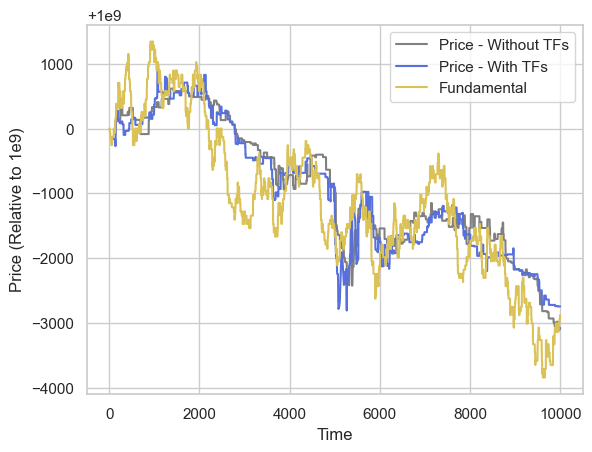

In [7]:
%%time

for seed in range(1, 10):

    surpluses_no_trend = []

    sim_no_trend = ShockSimulator(
                num_background_agents=66,
                num_trend_agents=0,
                sim_time=10000,
                num_assets = 1,
                lam = 2e-3,  
                lam_trend = 5e-3,
                mean = 1e9,
                r = 0,
                shock_var = 1e3,
                q_max = 10,
                pv_var = 1e6,
                shade=[500, 1000],
                obs_var = 1e6,
                eta = 0.8,
                observe_transactions = False,
                strategic_variance = 1e6,
                shock_entry_time = 5000,
                shock_interval = 500,
                shock_volume = 500,
                shock_side = SELL,
                L = 5,
                PI = 50.0,
                texp = 50,
                random_seed = seed,
                )


    data_no_trend = sim_no_trend.run()
    fundamental_val_no_trend = sim_no_trend.markets[0].get_final_fundamental()
    values_no_trend = []

    for agent_id in sim_no_trend.agents:
        agent = sim_no_trend.agents[agent_id]
        value = agent.get_pos_value() + agent.position * fundamental_val_no_trend + agent.cash
        # print(agent.cash, agent.position, agent.get_pos_value(), value)
        values_no_trend.append(value)
    surpluses_no_trend.append(sum(values_no_trend)/len(values_no_trend))

    print(f"AVG No Trend surplus: {sum(surpluses_no_trend)/len(surpluses_no_trend)}")
    print(f"No Trend surplusses:{surpluses_no_trend}")


    surpluses_trend = []

    sim_trend = ShockSimulator(
                num_background_agents=66,
                num_trend_agents=486,
                sim_time=10000,
                num_assets = 1,
                lam = 2e-3,  
                lam_trend = 5e-3,
                mean = 1e9,
                r = 0,
                shock_var = 1e3,
                q_max = 10,
                pv_var = 1e6,
                shade=[500, 1000],
                obs_var = 1e6,
                eta = 0.8,
                observe_transactions = False,
                strategic_variance = 1e6,
                shock_entry_time = 5000,
                shock_interval = 500,
                shock_volume = 500,
                shock_side = SELL,
                L = 5,
                PI = 50.0,
                texp = 50,
                random_seed = seed,
                )

    data_trend = sim_trend.run()
    fundamental_val_trend = sim_trend.markets[0].get_final_fundamental()
    values_trend = []

    for agent_id in sim_trend.agents:
        agent = sim_trend.agents[agent_id]
        value = agent.get_pos_value() + agent.position * fundamental_val_trend + agent.cash
        # print(agent.cash, agent.position, agent.get_pos_value(), value)
        values_trend.append(value)
    surpluses_trend.append(sum(values_trend)/len(values_trend))

    print(f"AVG Trend surplus: {sum(surpluses_trend)/len(surpluses_trend)}")
    print(f"Trend surplusses:{surpluses_trend}")

    Xnt, Ybnt, Yant, fnt = data_no_trend
    X, Yb, Ya, f = data_trend

    prices_nt = [(a + b) / 2 for a, b in zip(Ybnt, Yant)]
    prices = [(a + b) / 2 for a, b in zip(Yb, Ya)]

    plt.clf()

    # Plot using Seaborn and Matplotlib
    sns.set(style="whitegrid")
    palette = sns.color_palette("hls", 8)
    sns.lineplot(data=prices_nt, color='gray', label='Price - Without TFs')
    sns.lineplot(data=prices, color=palette[5], label='Price - With TFs')
    sns.lineplot(data=fnt, color=palette[1], label='Fundamental')
    # sns.lineplot(data=f, color='green', label='Fundamental')


    # Set plot labels and title
    plt.xlabel('Time')
    plt.ylabel('Price (Relative to 1e9)')
    plt.title('')

    # Display legend
    plt.legend()

    base = "/Users/rishithseelam/Code/SURE-SRG/market-sim-py/results/fig_6.3/"

    # Show plot
    plt.savefig(base + f"6.3_{seed}_SELL.png")


Buy Side Shock: 

AVG No Trend surplus: -571.8727416992188
No Trend surplusses:[tensor(-571.8727)]
AVG Trend surplus: -86.67937469482422
Trend surplusses:[tensor(-86.6794)]
AVG No Trend surplus: 1393.8641357421875
No Trend surplusses:[tensor(1393.8641)]
AVG Trend surplus: 249.34405517578125
Trend surplusses:[tensor(249.3441)]
AVG No Trend surplus: 251.72647094726562
No Trend surplusses:[tensor(251.7265)]
AVG Trend surplus: 58.46397399902344
Trend surplusses:[tensor(58.4640)]
AVG No Trend surplus: 1373.527587890625
No Trend surplusses:[tensor(1373.5276)]
AVG Trend surplus: 188.78793334960938
Trend surplusses:[tensor(188.7879)]
AVG No Trend surplus: -934.9671630859375
No Trend surplusses:[tensor(-934.9672)]
AVG Trend surplus: -119.04467010498047
Trend surplusses:[tensor(-119.0447)]
AVG No Trend surplus: 540.8536376953125
No Trend surplusses:[tensor(540.8536)]
AVG Trend surplus: 87.65818786621094
Trend surplusses:[tensor(87.6582)]
AVG No Trend surplus: -551.7278442382812
No Trend surplusses:[tensor(-551.72

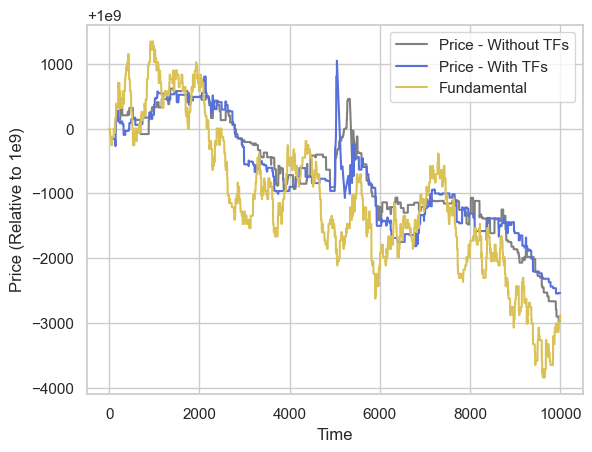

In [8]:
%%time

for seed in range(1, 10):

    surpluses_no_trend = []

    sim_no_trend = ShockSimulator(
                num_background_agents=66,
                num_trend_agents=0,
                sim_time=10000,
                num_assets = 1,
                lam = 2e-3,  
                lam_trend = 5e-3,
                mean = 1e9,
                r = 0,
                shock_var = 1e3,
                q_max = 10,
                pv_var = 1e6,
                shade=[500, 1000],
                obs_var = 1e6,
                eta = 0.8,
                observe_transactions = False,
                strategic_variance = 1e6,
                shock_entry_time = 5000,
                shock_interval = 500,
                shock_volume = 500,
                shock_side = BUY,
                L = 8,
                PI = 100.0,
                texp = 100,
                random_seed = seed,
                )


    data_no_trend = sim_no_trend.run()
    fundamental_val_no_trend = sim_no_trend.markets[0].get_final_fundamental()
    values_no_trend = []

    for agent_id in sim_no_trend.agents:
        agent = sim_no_trend.agents[agent_id]
        value = agent.get_pos_value() + agent.position * fundamental_val_no_trend + agent.cash
        # print(agent.cash, agent.position, agent.get_pos_value(), value)
        values_no_trend.append(value)
    surpluses_no_trend.append(sum(values_no_trend)/len(values_no_trend))

    print(f"AVG No Trend surplus: {sum(surpluses_no_trend)/len(surpluses_no_trend)}")
    print(f"No Trend surplusses:{surpluses_no_trend}")


    surpluses_trend = []

    sim_trend = ShockSimulator(
                num_background_agents=66,
                num_trend_agents=486,
                sim_time=10000,
                num_assets = 1,
                lam = 2e-3,  
                lam_trend = 5e-3,
                mean = 1e9,
                r = 0,
                shock_var = 1e3,
                q_max = 10,
                pv_var = 1e6,
                shade=[500, 1000],
                obs_var = 1e6,
                eta = 0.8,
                observe_transactions = False,
                strategic_variance = 1e6,
                shock_entry_time = 5000,
                shock_interval = 500,
                shock_volume = 500,
                shock_side = BUY,
                L = 8,
                PI = 100.0,
                texp = 100,
                random_seed = seed,
                )

    data_trend = sim_trend.run()
    fundamental_val_trend = sim_trend.markets[0].get_final_fundamental()
    values_trend = []

    for agent_id in sim_trend.agents:
        agent = sim_trend.agents[agent_id]
        value = agent.get_pos_value() + agent.position * fundamental_val_trend + agent.cash
        # print(agent.cash, agent.position, agent.get_pos_value(), value)
        values_trend.append(value)
    surpluses_trend.append(sum(values_trend)/len(values_trend))

    print(f"AVG Trend surplus: {sum(surpluses_trend)/len(surpluses_trend)}")
    print(f"Trend surplusses:{surpluses_trend}")

    Xnt, Ybnt, Yant, fnt = data_no_trend
    X, Yb, Ya, f = data_trend

    prices_nt = [(a + b) / 2 for a, b in zip(Ybnt, Yant)]
    prices = [(a + b) / 2 for a, b in zip(Yb, Ya)]

    plt.clf()

    # Plot using Seaborn and Matplotlib
    sns.set(style="whitegrid")
    palette = sns.color_palette("hls", 8)
    sns.lineplot(data=prices_nt, color='gray', label='Price - Without TFs')
    sns.lineplot(data=prices, color=palette[5], label='Price - With TFs')
    sns.lineplot(data=fnt, color=palette[1], label='Fundamental')
    # sns.lineplot(data=f, color='green', label='Fundamental')


    # Set plot labels and title
    plt.xlabel('Time')
    plt.ylabel('Price (Relative to 1e9)')
    plt.title('')

    # Display legend
    plt.legend()

    base = "/Users/rishithseelam/Code/SURE-SRG/market-sim-py/results/fig_6.3/"

    # Show plot
    plt.savefig(base + f"6.3_{seed}_BUY.png")
